### Table of Contents:
#### Preamble
#### Popularity Dataset

1. Neural Networks
    - Learning Curves
    - Cross Validation
    - Evaluation Metrics
&nbsp;
&nbsp;
2. K Nearest Neighbours
    - Learning Curves
    - Cross Validation
    - Evaluation Metrics
&nbsp;
&nbsp;
3. Comparison Between Algorithms

#### Mobile App Feature Dataset


1. Neural Networks
    - Learning Curves
    - Cross Validation
    - Evaluation Metrics
&nbsp;
&nbsp;
2. K Nearest Neighbours
    - Learning Curves
    - Cross Validation
    - Evaluation Metrics
&nbsp;
&nbsp;
3. Comparison Between Algorithms



## Preamble

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import f1_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import itertools

from IPython.display import Image

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Student Dataset

We have already seen this dataset already, hence no exploratory data analysis is required.

In [5]:
df1 = pd.read_csv('student-mat.csv')
df1.columns = df1.columns.str.strip()

Median is 11.0
Mean is 10


(1, 25)

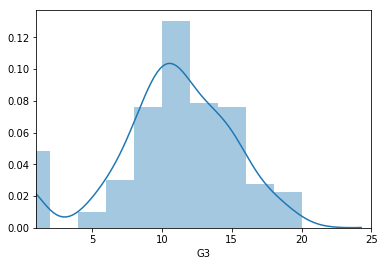

In [11]:
print('Median is {}'.format(round(np.median(df1['G3'])), 2))
print('Mean is {}'.format(round(np.mean(df1['G3'])), 2))
g = sns.distplot(df1['G3'], bins = 10)
g.set_xlim(1, 25)

In [5]:
df1['G3'] = np.where(df1['G3'] >= 10, 1, 0)

Let's decide Grade 3 > 10 to be good student (class 1) and less than 10 are poor students (class 0)

##### Scaling the variables using MinMaxScaler
Various attributes have different range of values they take. For e.g. n_tokens_title is usually in double digits whereas n_tokens_content is in three digits.
Hence, it is important that we bring all the attributes on the same scale. For this purpose we use MinMax Scaler from sklearn library.

__MinMaxScaler__ 
This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one. This transformation is often used as an alternative to zero mean, unit variance scaling.

The transformation is given by:
```
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min
```
where min, max = feature_range.

In [14]:
df = df1[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'G3']]

#Convert dummy variables values into 0/1.
df.school = df['school'].replace(['GP', 'MS'], [1,0])
df.sex = df['sex'].replace(['F','M'],[1,0])
df.address = df['address'].replace(['U','R'], [1,0])
df.famsize = df['famsize'].replace(['LE3','GT3'], [1,0])
df.Pstatus = df['Pstatus'].replace(['T','A'], [1,0])
df.schoolsup = df['schoolsup'].replace(['yes','no'],[1,0])
df.famsup = df['famsup'].replace(['yes','no'],[1,0])
df.activities = df['activities'].replace(['yes','no'],[1,0])
df.nursery = df['nursery'].replace(['yes','no'],[1,0])
df.higher = df['higher'].replace(['yes','no'],[1,0])
df.internet = df['internet'].replace(['yes','no'],[1,0])
df.romantic = df['romantic'].replace(['yes','no'],[1,0])
#Identify nominal variables
norminal_vars = ['Fjob', 'Mjob', 'reason','guardian']
#Convert norminal variables to dummy variables
df = pd.get_dummies(df, columns= norminal_vars, drop_first=True)

scaler = MinMaxScaler()
scaler.fit(df)
df =np.array(scaler.transform(df))

In [15]:
cols = df.shape[1]                                                         #Number of columns
df_X = df[:,0:cols-1]                                                      #Filter independent variables
df_y = df[:,cols-1:cols]

#Train and test splits
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y,test_size=0.3, random_state = 5531)

## We will classify anything more than 3rd quartile as a good student##
#y_train = np.where(y_train > np.median(y_train), 1, 0)                   #For logistic regression
#y_test = np.where(y_test > np.median(y_train), 1, 0)                     #For logistic regression

y_train = np.array(y_train).flatten()                                    #For linear regression
y_test = np.array(y_test).flatten()                                      #For linear regression


## Neural Networks

**Learning Curve of error vs hidden layer sizes for activation function: Sigmoid, Tanh, ReLU**

Text(0,0.5,'Error rate')

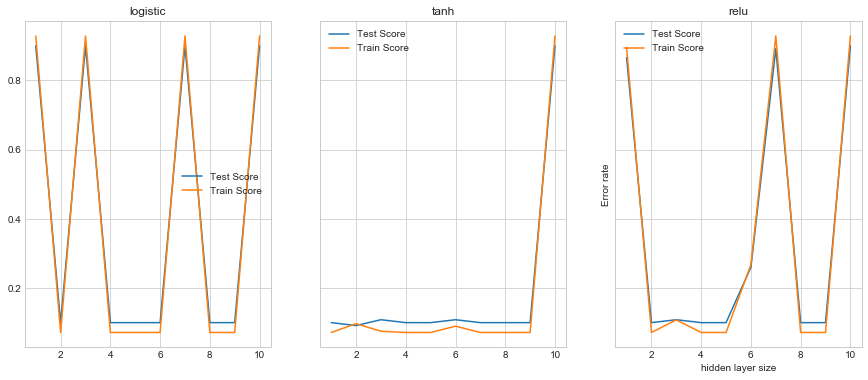

In [16]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

axs = axs.ravel()

hidden_layer_sizes = [(5), (5,5), (5,5,5), (5,2,5,2), (10), (10,5), (10,5,5), (10,5,5,3), (5,4,3), (5,3,4)]
activation = ['logistic', 'tanh', 'relu']
    
for k in range(0, len(activation)):
    
    error_test=[]
    error_train=[]
    for i in range(0, len(hidden_layer_sizes)):
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes[i], max_iter=20, activation = activation[k], tol=1e-4, random_state=23832)
    
        mlp.fit(X_train, y_train)

        error_test.append(zero_one_loss(y_test, mlp.predict(X_test)))
        error_train.append(zero_one_loss(y_train, mlp.predict(X_train)))

    
    
    
    axs[k].plot([1,2,3,4,5,6,7,8,9,10], error_test)
    axs[k].plot([1,2,3,4,5,6,7,8,9,10], error_train)

    axs[k].set_title(activation[k])

    axs[k].legend(['Test Score', 'Train Score'])
    
plt.xlabel("hidden layer size")
plt.ylabel("Error rate")
    
    

The best model seems to be with tanh activation function and 3 layers of 5, 4 and 3 nodes each respectively.
Let's use cross validation and plot a learning curve between sample size and error to find out the presence of bias or variance!

**Cross-validation**

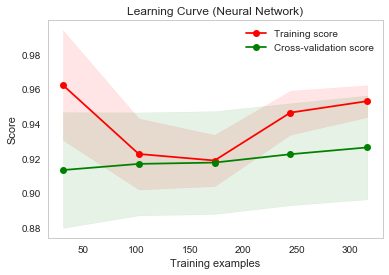

In [37]:
sns.set(style="whitegrid")

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X, y = df_X, df_y


title = "Learning Curve (Neural Network)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=23432)

estimator = MLPClassifier(hidden_layer_sizes=(5,4,3), activation = 'tanh', tol=1e-4, random_state=23832)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

From the above chart, we can conclude that there is presence of high variance.
Also, model does look a little biased.

In [38]:
# Traing ANN
mlp = MLPClassifier(hidden_layer_sizes=(5,4,3), activation = 'tanh', tol=1e-4, random_state=23832)
mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 4, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=23832,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Confusion matrix, without normalization
[[106   1]
 [ 11   1]]
Normalized confusion matrix
[[0.99 0.01]
 [0.92 0.08]]


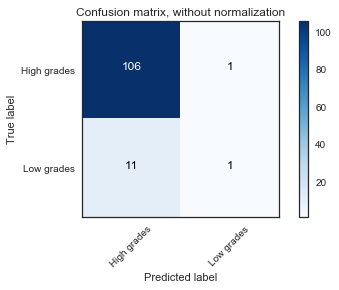

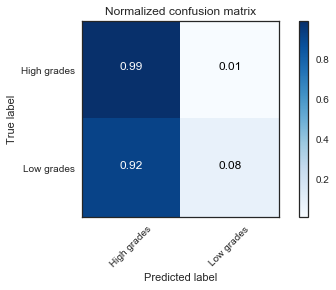

In [40]:
sns.set_style('white')

## Confusion Matrix

class_names = ['High grades', 'Low grades']

y_pred = mlp.predict(X_test)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [39]:
print('f1 score for training dataset is {}' .format(round(f1_score(y_train, mlp.predict(X_train)), 2)))

print('f1 score for testing dataset is {}' .format(round(f1_score(y_test, mlp.predict(X_test)), 2)))

f1 score for training dataset is 0.6
f1 score for testing dataset is 0.14


Model is somewhat generalized after the experimentation with layer sizes and activation function.  
F1 score can be improved by experimenting with the features, this will also help us reducing the bias and variance.

## KNN

We will use **euclidean distance** as it will help us find the articles most similar to each other.    
In Cartesian coordinates, if p = (p1, p2,..., pn) and q = (q1, q2,..., qn) are two points in Euclidean n-space, then the distance (d) from p to q, or from q to p is given by the Pythagorean formula:

\begin{aligned}d(\mathbf {p} ,\mathbf {q} )=d(\mathbf {q} ,\mathbf {p} )&={\sqrt {(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}+\cdots +(q_{n}-p_{n})^{2}}}\\[8pt]&={\sqrt {\sum _{i=1}^{n}(q_{i}-p_{i})^{2}}}.\end{aligned}
\begin{aligned}d(\mathbf {p} ,\mathbf {q} )=d(\mathbf {q} ,\mathbf {p} )&={\sqrt {(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}+\cdots +(q_{n}-p_{n})^{2}}}\\[8pt]&={\sqrt {\sum _{i=1}^{n}(q_{i}-p_{i})^{2}}}.\end{aligned}

**Learning Curve of error vs number of neighbours**

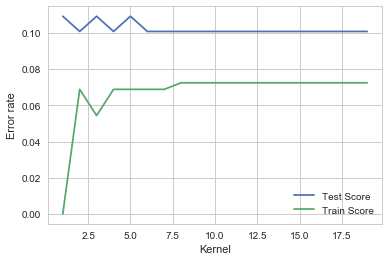

In [41]:
sns.set_style('whitegrid')
#fig, axs = plt.subplots(3,1, figsize=(8, 20), facecolor='w', edgecolor='k', sharex=True, sharey=True)

#axs = axs.ravel()

kvalue = range(1,20,1)
    
#for k in range(0, len(algo)):
    
error_test=[]
error_train=[]
for i in range(0, len(kvalue)):
    knn = KNeighborsClassifier(n_neighbors= kvalue[i])
    knn.fit(X_train, y_train)

    error_test.append(zero_one_loss(y_test, knn.predict(X_test)))
    error_train.append(zero_one_loss(y_train, knn.predict(X_train)))

    

plt.plot(kvalue, error_test)
plt.plot(kvalue, error_train)
plt.xlabel('Kernel')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

- Optimum value of k is 8
- It takes a lot of time to run, hence not desirable
- High training time is because KNN is a lazy learner

In [67]:
knn = KNeighborsClassifier(n_neighbors= 8, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

Confusion matrix, without normalization
[[107   0]
 [ 12   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


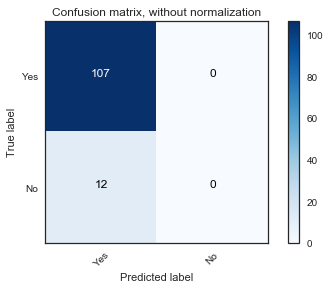

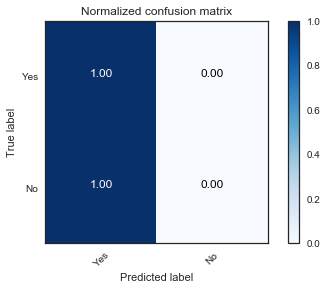

In [68]:
sns.set_style('white')

## Confusion Matrix
class_names = ['Yes', 'No']

y_pred = knn.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [69]:
print('f1 score for training dataset is {}' .format(round(f1_score(y_train, knn.predict(X_train)), 2)))

print('f1 score for training dataset is {}' .format(round(f1_score(y_test, knn.predict(X_test)), 2)))

f1 score for training dataset is 0.0
f1 score for training dataset is 0.0


## Comparison Between Various Algorithms from Assignments

| **Algorithm**       | **F Score**        |
|---------------------|--------------------|
| Linear Regrassion   | 0.00069 (R square) |
| Logistic Regression | 0.79               |
| SVM                 | 0.64               |
| Decision Tree       | 0.61               |
| Boosting (AdaBoost) | 0.66               |
| Neural Network      | 0.14               |
| KNN                 | 0.00               |

Logistic regression performs the best here. Although none of the implemented algorithms have resulted in a satifactory model.  
Reason why these algorithms couldn't do well is probably because of the we feeded all the attributes into them without any tranformations or dimensionality reduction.  
Although, even after feature engineering we should not expect a totally great result as the distribution of shares is itself skewed.

**What additional thing can we do to improve our results?**  
We can do feature transformations and dimentionality reduction in order to improve results and get around the curse of dimensionality.  
**Why did KNN took so long to run?**  
We used scikit learn implemntation which is slower but can be made faster using cython. Also, KNN is a lazy learner which makes it's training slower than other learners.  
**Would cross validation help?**  
Yes, but we have not implemented cross validation for KNN in this dataset as it was computationally getting heavy for the system. For rest of the algorithm and dataset, cross validation has been carried out and been useful.
